# EDA (Exploration Data Analysis)

In [1]:
import pandas as pd

from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.lancaster import LancasterStemmer
import string

In [2]:
from globals import TRAINING_PATH, TEST_PATH, FINAL_DS, WORDS_PATH

In [3]:
df_train = pd.read_csv(TRAINING_PATH)
df_test = pd.read_csv(TEST_PATH)
df_full = pd.concat([df_train, df_test], ignore_index=True)

In [4]:
df_full.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ArticleId,2225.0,1113.0,642.446496,1.0,557.0,1113.0,1669.0,2225.0


In [5]:
df_full.head()

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


<Axes: xlabel='Category'>

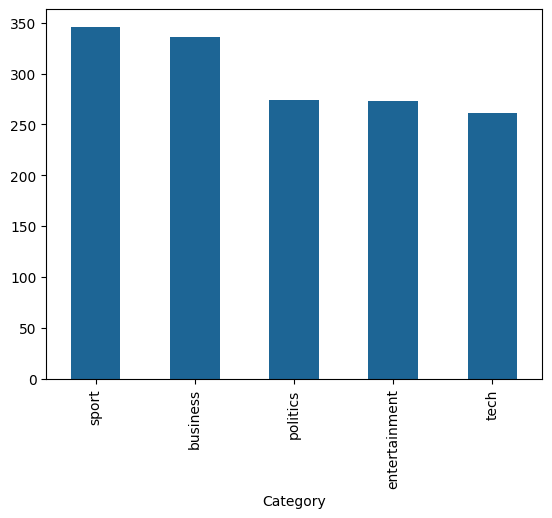

In [6]:
df_train['Category'].value_counts().plot(kind='bar', color='#1D6595')


In [7]:
categories = list(set(df_train['Category']))
categories

['entertainment', 'business', 'tech', 'politics', 'sport']

In [8]:
stoplist = set(stopwords.words('english'))
print(stoplist)

{'through', 'why', 'so', 'doesn', 'each', 'during', 'should', 'few', 'further', 'than', 'itself', 'an', 'me', 'have', 'nor', 'does', 'doing', 'ours', 'be', "you'd", "won't", 'can', 'he', 'ain', 'a', 'd', 'we', 'shan', 'what', 'above', 'him', 'the', "needn't", 'any', 'this', 'are', 'with', 'there', 'until', 'for', 'down', 'our', 'at', 'is', 'had', 'while', 'which', 'to', "doesn't", 'most', 'from', "don't", 'needn', 'who', 'yourselves', "hasn't", 'such', 'i', 'own', 'them', 'below', 'hers', 'again', 'ma', 'wasn', 'how', 'himself', 'wouldn', "you've", 'if', 'won', 'where', 'both', 'hasn', "you're", 'will', 'been', 'out', 'her', 'off', 'aren', 'themselves', 'whom', 'more', 'some', 'no', 'they', 'same', 'under', 'theirs', 'has', 'against', 'here', "weren't", 'his', 'now', 'myself', 'shouldn', 'it', 'as', 'or', "that'll", 'too', 'hadn', 'she', 'but', 'its', 'you', 'did', 'yours', 'before', "it's", 'not', 'o', "isn't", 'herself', 'over', 'am', 'in', 'yourself', "shan't", "mustn't", "hadn't", 

In [9]:
STOPLIST = set(stopwords.words('english'))

In [10]:
def get_terms_fq(text):
    terms = {}
    st = LancasterStemmer()
    word_list = [st.stem(word) for word in word_tokenize(text.lower())
                 if not word in STOPLIST and not word in string.punctuation]

    for word in word_list:
        terms[word] = terms.get(word, 0) + 1
    return terms

In [11]:
def get_words(text):
    word_list = [word for word in word_tokenize(text.lower())]
    return word_list

In [12]:
df_full['Words'] = df_full['Text'].apply(get_words)
df_full['Terms_Frequency'] = df_full['Text'].apply(get_terms_fq)
df_full

,ArticleId,Text,Category,Words,Terms_Frequency
0,1833,worldcom ex-boss launches defence lawyers defe...,business,"[worldcom, ex-boss, launches, defence, lawyers...","{'worldcom': 9, 'ex-boss': 1, 'launch': 1, 'de..."
1,154,german business confidence slides german busin...,business,"[german, business, confidence, slides, german,...","{'germ': 4, 'busy': 3, 'confid': 5, 'slid': 1,..."
2,1101,bbc poll indicates economic gloom citizens in ...,business,"[bbc, poll, indicates, economic, gloom, citize...","{'bbc': 5, 'pol': 7, 'ind': 2, 'econom': 13, '..."
3,1976,lifestyle governs mobile choice faster bett...,tech,"[lifestyle, governs, mobile, choice, faster, b...","{'lifestyl': 3, 'govern': 2, 'mobl': 7, 'cho':..."
4,917,enron bosses in $168m payout eighteen former e...,business,"[enron, bosses, in, $, 168m, payout, eighteen,...","{'enron': 7, 'boss': 1, '168m': 3, 'payout': 1..."
...,...,...,...,...,...
2220,1923,eu to probe alitalia state aid the european ...,sport,"[eu, to, probe, alitalia, state, aid, the, eur...","{'eu': 3, 'prob': 1, 'alital': 7, 'stat': 8, '..."
2221,373,u2 to play at grammy awards show irish rock ba...,tech,"[u2, to, play, at, grammy, awards, show, irish...","{'u2': 4, 'play': 3, 'grammy': 4, 'award': 5, ..."
2222,1704,sport betting rules in spotlight a group of mp...,business,"[sport, betting, rules, in, spotlight, a, grou...","{'sport': 8, 'bet': 15, 'rul': 1, 'spotlight':..."
2223,206,alfa romeos to get gm engines fiat is to sto...,entertainment,"[alfa, romeos, to, get, gm, engines, fiat, is,...","{'alf': 5, 'romeo': 5, 'get': 2, 'gm': 6, 'eng..."


# See terms frequency

In [13]:
maxis = {c: [] for c in categories}

for i, row in df_full.iterrows():
    terms_fq = row["Terms_Frequency"]
    max_value = max(terms_fq.values())
    max_keys = [k for k, v in terms_fq.items() if v == max_value]
    maxis[row["Category"]].append(max_keys[0])



for cat, words in maxis.items():
    maxis[cat] = list(set(words))

In [14]:
import json

with open(WORDS_PATH, "w") as f:
    json.dump(maxis, f)


# Coomon words

In [17]:
common_words_category = {}

for category in categories:
    category_words = df_full[df_full['Category'] == category]['Words'].tolist()
    sets_list = [set(words) for words in category_words]
    common_words = set.intersection(*sets_list)
    common_words_category[category] =  common_words

common_words_category

{'entertainment': {'.', 'the'},
 'business': {'.', 'the'},
 'tech': {'.', 'and', 'the'},
 'politics': {'.', 'the', 'to'},
 'sport': {'.', 'the'}}

# Dump DS

In [ ]:
df_full.to_csv(FINAL_DS, index=False)

In [18]:
from globals import CORPUS_PATH 
from models import Doc
from utils import dump_corpus

In [19]:


corpus = []

for index, row in df_full.iterrows():
    doc = Doc(id=index+1, category=row['Category'], content=row['Text'])
    corpus.append(doc)

dump_corpus(CORPUS_PATH, corpus)


# Integrate test

In [ ]:
df_docs_tes = pd.read_csv("../data/learn-ai-bbc/test_docs.csv")
df_labels_test = pd.read_csv("../data/learn-ai-bbc/test_classes.csv")

In [ ]:
df_docs_tes.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ArticleId,735.0,1099.42449,643.925514,1.0,545.5,1116.0,1657.5,2225.0


In [ ]:
dict_docs = df_docs_tes.to_dict(orient='records')

In [ ]:
merged_df = pd.merge(df_docs_tes, df_labels_test, on='ArticleId')
merged_df

,ArticleId,Text,Category
0,1018,qpr keeper day heads for preston queens park r...,sport
1,1319,software watching while you work software that...,tech
2,1138,d arcy injury adds to ireland woe gordon d arc...,business
3,459,india s reliance family feud heats up the ongo...,entertainment
4,1020,boro suffer morrison injury blow middlesbrough...,politics
...,...,...,...
730,1923,eu to probe alitalia state aid the european ...,sport
731,373,u2 to play at grammy awards show irish rock ba...,tech
732,1704,sport betting rules in spotlight a group of mp...,business
733,206,alfa romeos to get gm engines fiat is to sto...,entertainment


In [ ]:
merged_df.to_csv("../data/learn-ai-bbc/BBC News Test.csv", index=False)